In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
from kaggle_secrets import UserSecretsClient

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


env = UserSecretsClient()
fred_key = env.get_secret('FRED-API')


In [3]:
!pip install fredapi 

# 1. Create Fred Object

In [4]:
# Fred
from fredapi import Fred
fred = Fred(api_key=fred_key)


#Search Economic data
sa_gni_search = fred.search("south africa gni")
sa_unemploymentRate_search = fred.search("south africa unemployment")

#Display Economic data
sa_gni_search 
sa_unemploymentRate_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LRUN64TTZAQ156S,LRUN64TTZAQ156S,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-07-01,2024-07-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-12-16 13:44:03-06:00,29,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
LRUN64TTZAA156S,LRUN64TTZAA156S,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-01-01,2023-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2024-04-10 11:19:05-05:00,2,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
LRUN64TTZAQ156N,LRUN64TTZAQ156N,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-07-01,2024-07-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-12-16 13:44:18-06:00,2,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
LRUN64TTZAA156N,LRUN64TTZAA156N,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-04-10 11:41:08-05:00,1,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
LRUNTTTTZAQ156S,LRUNTTTTZAQ156S,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-07-01,2024-07-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-12-16 13:44:18-06:00,5,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUNTTMAZAQ156S,LRUNTTMAZAQ156S,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-07-01,2024-07-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-12-16 13:46:33-06:00,0,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
LRUNTTFEZAA156N,LRUNTTFEZAA156N,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-04-10 12:23:47-05:00,0,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...
LRUNTTFEZAA156S,LRUNTTFEZAA156S,2025-01-05,2025-01-05,Infra-Annual Labor Statistics: Unemployment Ra...,2000-01-01,2023-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2024-04-10 12:23:47-05:00,0,OECD Data Filters: REF_AREA: ZAF MEASURE: UNE...


In [5]:
#Display series 
    
sa_gni = fred.get_series('MKTGNIZAA646NWDB', observation_start='2015-01-01'  ) # GNI
print("\n")
sa_unemploymentRate = fred.get_series('LRUN64TTZAA156S', observation_start='2015-01-01'  ) # Unemployment Rate

<Axes: >

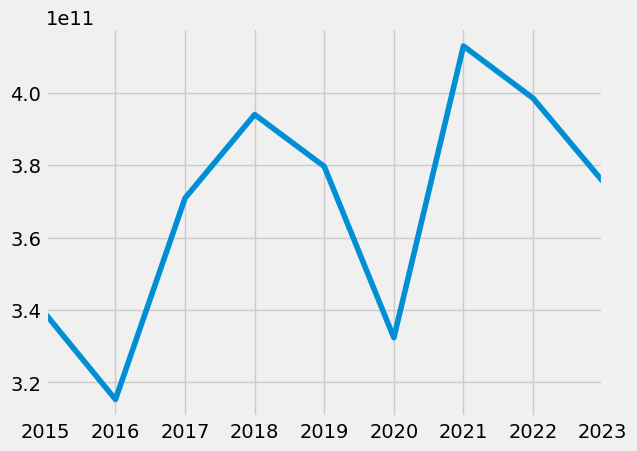

In [6]:
#plot 
sa_gni.plot()

<Axes: >

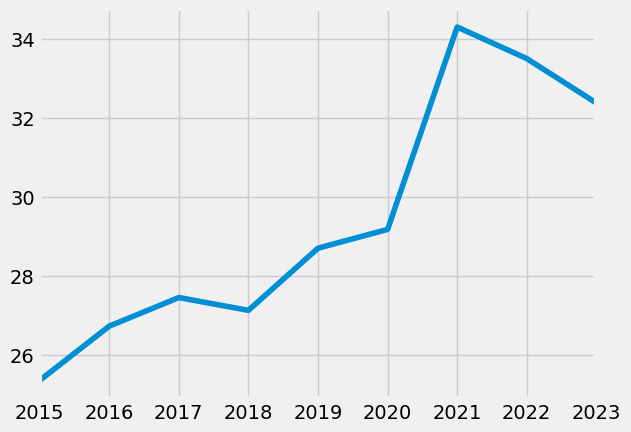

In [7]:
sa_unemploymentRate.plot()